# Regression Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
kz_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/model_ready/kz_modeling_ready.csv')
foreign_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/model_ready/foreign_modeling_ready.csv')

In [5]:
print(f"Kazakhstan: {kz_data.shape}")
print(f"Foreign: {foreign_data.shape}")

Kazakhstan: (121, 16)
Foreign: (649, 16)


# Prepare Data for Training

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
def prepare_train_test_kz(df, test_size=0.2, random_state=42):
    """Split, encode categorical features, handle NaN, and scale (Kazakhstan)"""
    
    df = df.copy()
    
    # Target
    y = df['gpa']
    X = df.drop(columns=['gpa'])
    
    # Encode categorical + fill NaN
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            X[col] = X[col].fillna(X[col].mean())
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def prepare_train_test_foreign(df, test_size=0.2, random_state=42):
    """Split, encode categorical features, handle NaN, and scale (Foreign)"""
    
    df = df.copy()
    
    y = df['final_grade']
    X = df.drop(columns=['final_grade'])
    
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            X[col] = X[col].fillna(X[col].mean())
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

kz_X_train, kz_X_test, kz_y_train, kz_y_test, kz_scaler = \
    prepare_train_test_kz(kz_data)

foreign_X_train, foreign_X_test, foreign_y_train, foreign_y_test, foreign_scaler = \
    prepare_train_test_foreign(foreign_data)

print("\nTrain/Test Split Complete!")
print(f"Kazakhstan - Train: {kz_X_train.shape}, Test: {kz_X_test.shape}")
print(f"Foreign - Train: {foreign_X_train.shape}, Test: {foreign_X_test.shape}")


Train/Test Split Complete!
Kazakhstan - Train: (96, 15), Test: (25, 15)
Foreign - Train: (519, 15), Test: (130, 15)


# Define Evaluation Function

In [11]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, dataset_name):
    """Evaluate regression model"""
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                                 scoring='r2', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    print(f"\n{'='*60}")
    print(f"{dataset_name} - {model_name}")
    print(f"{'='*60}")
    print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
    print(f"CV R² (5-fold): {cv_mean:.4f} (+/- {cv_std:.4f})")
    
    results = {
        'Model': model_name,
        'Dataset': dataset_name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'CV_R2_Mean': cv_mean,
        'CV_R2_Std': cv_std
    }
    
    return results, model, y_test_pred

# Linear Regression

In [12]:
print("\n" + "="*60)
print("LINEAR REGRESSION")
print("="*60)

# Kazakhstan
kz_lr_results, kz_lr_model, kz_lr_pred = evaluate_model(
    LinearRegression(),
    kz_X_train, kz_X_test, kz_y_train, kz_y_test,
    "Linear Regression", "Kazakhstan"
)

# Foreign
foreign_lr_results, foreign_lr_model, foreign_lr_pred = evaluate_model(
    LinearRegression(),
    foreign_X_train, foreign_X_test, foreign_y_train, foreign_y_test,
    "Linear Regression", "Foreign"
)


LINEAR REGRESSION

Kazakhstan - Linear Regression
Train R²: 0.2015 | Test R²: 0.0610
Train RMSE: 0.6079 | Test RMSE: 0.8113
Train MAE: 0.4089 | Test MAE: 0.5168
CV R² (5-fold): -0.7051 (+/- 0.7933)

Foreign - Linear Regression
Train R²: 0.8432 | Test R²: 0.8679
Train RMSE: 0.4539 | Test RMSE: 0.4268
Train MAE: 0.3429 | Test MAE: 0.3415
CV R² (5-fold): 0.8292 (+/- 0.0236)


# Ridge Regression

In [13]:
print("\n" + "="*60)
print("RIDGE REGRESSION")
print("="*60)

# Kazakhstan
kz_ridge_results, kz_ridge_model, kz_ridge_pred = evaluate_model(
    Ridge(alpha=1.0, random_state=42),
    kz_X_train, kz_X_test, kz_y_train, kz_y_test,
    "Ridge Regression", "Kazakhstan"
)

# Foreign
foreign_ridge_results, foreign_ridge_model, foreign_ridge_pred = evaluate_model(
    Ridge(alpha=1.0, random_state=42),
    foreign_X_train, foreign_X_test, foreign_y_train, foreign_y_test,
    "Ridge Regression", "Foreign"
)


RIDGE REGRESSION

Kazakhstan - Ridge Regression
Train R²: 0.2007 | Test R²: 0.0812
Train RMSE: 0.6082 | Test RMSE: 0.8025
Train MAE: 0.4079 | Test MAE: 0.5105
CV R² (5-fold): -0.6165 (+/- 0.6430)

Foreign - Ridge Regression
Train R²: 0.8432 | Test R²: 0.8679
Train RMSE: 0.4539 | Test RMSE: 0.4268
Train MAE: 0.3430 | Test MAE: 0.3415
CV R² (5-fold): 0.8293 (+/- 0.0235)


# Lasso Regression

In [14]:
print("\n" + "="*60)
print("LASSO REGRESSION")
print("="*60)

# Kazakhstan
kz_lasso_results, kz_lasso_model, kz_lasso_pred = evaluate_model(
    Lasso(alpha=0.1, random_state=42, max_iter=10000),
    kz_X_train, kz_X_test, kz_y_train, kz_y_test,
    "Lasso Regression", "Kazakhstan"
)

# Foreign
foreign_lasso_results, foreign_lasso_model, foreign_lasso_pred = evaluate_model(
    Lasso(alpha=0.1, random_state=42, max_iter=10000),
    foreign_X_train, foreign_X_test, foreign_y_train, foreign_y_test,
    "Lasso Regression", "Foreign"
)



LASSO REGRESSION

Kazakhstan - Lasso Regression
Train R²: 0.0655 | Test R²: 0.0498
Train RMSE: 0.6576 | Test RMSE: 0.8162
Train MAE: 0.4405 | Test MAE: 0.5370
CV R² (5-fold): -0.0877 (+/- 0.0743)

Foreign - Lasso Regression
Train R²: 0.8256 | Test R²: 0.8506
Train RMSE: 0.4786 | Test RMSE: 0.4540
Train MAE: 0.3720 | Test MAE: 0.3546
CV R² (5-fold): 0.8224 (+/- 0.0217)


# Elastic Net

In [15]:
print("\n" + "="*60)
print("ELASTIC NET")
print("="*60)

# Kazakhstan
kz_enet_results, kz_enet_model, kz_enet_pred = evaluate_model(
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000),
    kz_X_train, kz_X_test, kz_y_train, kz_y_test,
    "Elastic Net", "Kazakhstan"
)

# Foreign
foreign_enet_results, foreign_enet_model, foreign_enet_pred = evaluate_model(
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000),
    foreign_X_train, foreign_X_test, foreign_y_train, foreign_y_test,
    "Elastic Net", "Foreign"
)


ELASTIC NET

Kazakhstan - Elastic Net
Train R²: 0.1317 | Test R²: 0.1195
Train RMSE: 0.6339 | Test RMSE: 0.7856
Train MAE: 0.4258 | Test MAE: 0.5131
CV R² (5-fold): -0.1322 (+/- 0.0819)

Foreign - Elastic Net
Train R²: 0.8313 | Test R²: 0.8501
Train RMSE: 0.4708 | Test RMSE: 0.4547
Train MAE: 0.3631 | Test MAE: 0.3586
CV R² (5-fold): 0.8263 (+/- 0.0218)


# Compare All Models

In [16]:
all_results = pd.DataFrame([
    kz_lr_results, kz_ridge_results, kz_lasso_results, kz_enet_results,
    foreign_lr_results, foreign_ridge_results, foreign_lasso_results, foreign_enet_results
])

print("\n" + "="*60)
print("MODEL COMPARISON - ALL RESULTS")
print("="*60)
print(all_results[['Model', 'Dataset', 'Test_R2', 'Test_RMSE', 'Test_MAE']])


MODEL COMPARISON - ALL RESULTS
               Model     Dataset   Test_R2  Test_RMSE  Test_MAE
0  Linear Regression  Kazakhstan  0.060983   0.811326  0.516793
1   Ridge Regression  Kazakhstan  0.081228   0.802533  0.510484
2   Lasso Regression  Kazakhstan  0.049765   0.816158  0.536970
3        Elastic Net  Kazakhstan  0.119526   0.785628  0.513116
4  Linear Regression     Foreign  0.867946   0.426765  0.341478
5   Ridge Regression     Foreign  0.867949   0.426761  0.341542
6   Lasso Regression     Foreign  0.850557   0.453996  0.354556
7        Elastic Net     Foreign  0.850071   0.454733  0.358619


# Visualize Model Performance

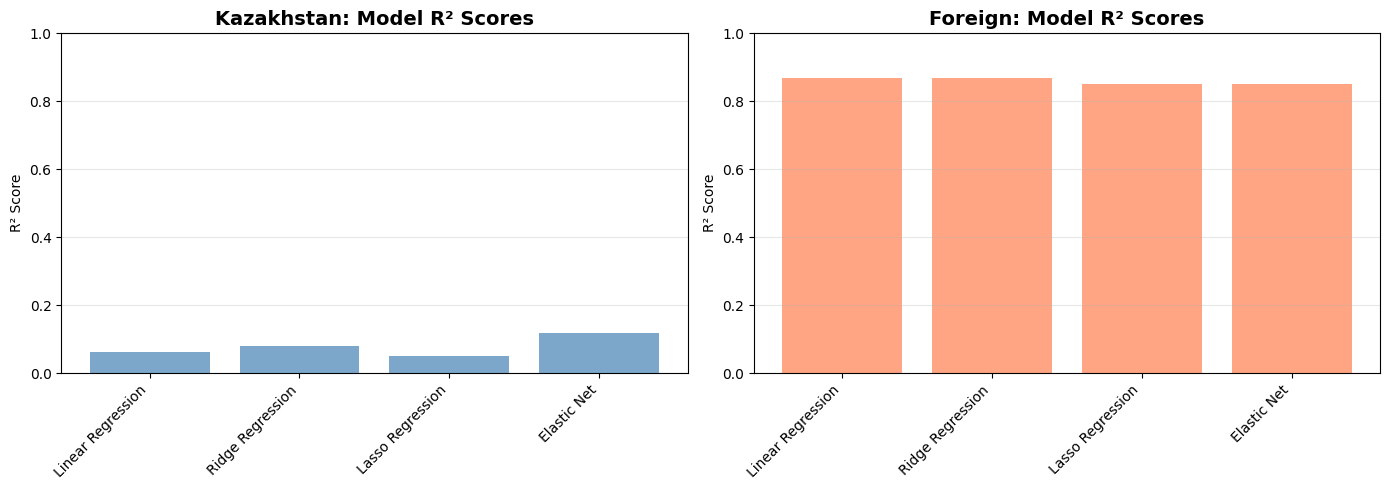

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Kazakhstan
kz_results = all_results[all_results['Dataset'] == 'Kazakhstan']
axes[0].bar(kz_results['Model'], kz_results['Test_R2'], alpha=0.7, color='steelblue')
axes[0].set_title('Kazakhstan: Model R² Scores', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim([0, 1])
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Foreign
foreign_results = all_results[all_results['Dataset'] == 'Foreign']
axes[1].bar(foreign_results['Model'], foreign_results['Test_R2'], alpha=0.7, color='coral')
axes[1].set_title('Foreign: Model R² Scores', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim([0, 1])
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/regression_models_r2_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()


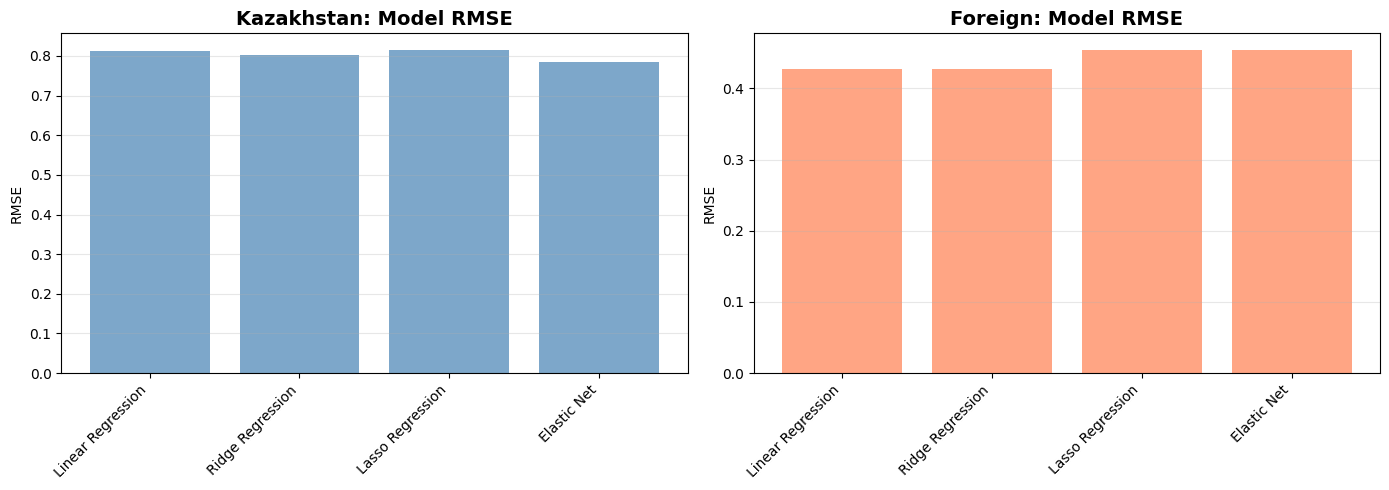

In [20]:
# Plot RMSE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Kazakhstan
axes[0].bar(kz_results['Model'], kz_results['Test_RMSE'], alpha=0.7, color='steelblue')
axes[0].set_title('Kazakhstan: Model RMSE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('RMSE')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Foreign
axes[1].bar(foreign_results['Model'], foreign_results['Test_RMSE'], alpha=0.7, color='coral')
axes[1].set_title('Foreign: Model RMSE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE')
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/regression_models_rmse_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# Actual vs Predicted Plots

In [19]:
def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
    """Plot actual vs predicted values"""
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    # Perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    plt.xlabel('Actual GPA')
    plt.ylabel('Predicted GPA')
    plt.title(f'{dataset_name}: {model_name}\nActual vs Predicted', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt


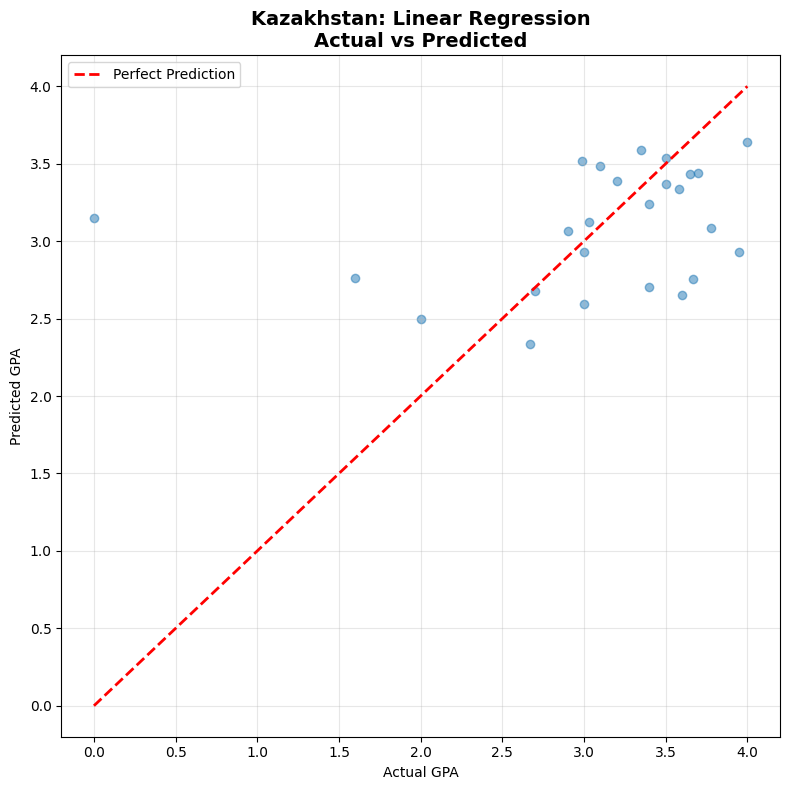

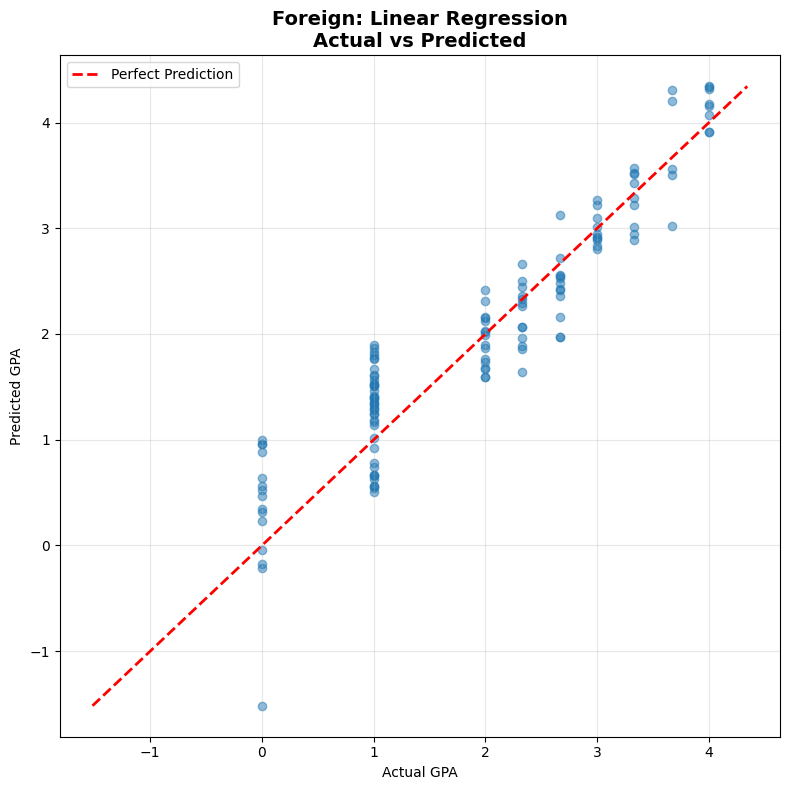

In [22]:
# Best models 
plot_actual_vs_predicted(kz_y_test, kz_lr_pred, "Linear Regression", "Kazakhstan")
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/kz_lr_actual_vs_predicted.png', 
            dpi=300, bbox_inches='tight')
plt.show()

plot_actual_vs_predicted(foreign_y_test, foreign_lr_pred, "Linear Regression", "Foreign")
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regressionforeign_lr_actual_vs_predicted.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# Actual vs Predicted Plots

In [23]:
def plot_actual_vs_predicted(y_true, y_pred, model_name, dataset_name):
    """Plot actual vs predicted values"""
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    # Perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    plt.xlabel('Actual GPA')
    plt.ylabel('Predicted GPA')
    plt.title(f'{dataset_name}: {model_name}\nActual vs Predicted', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt

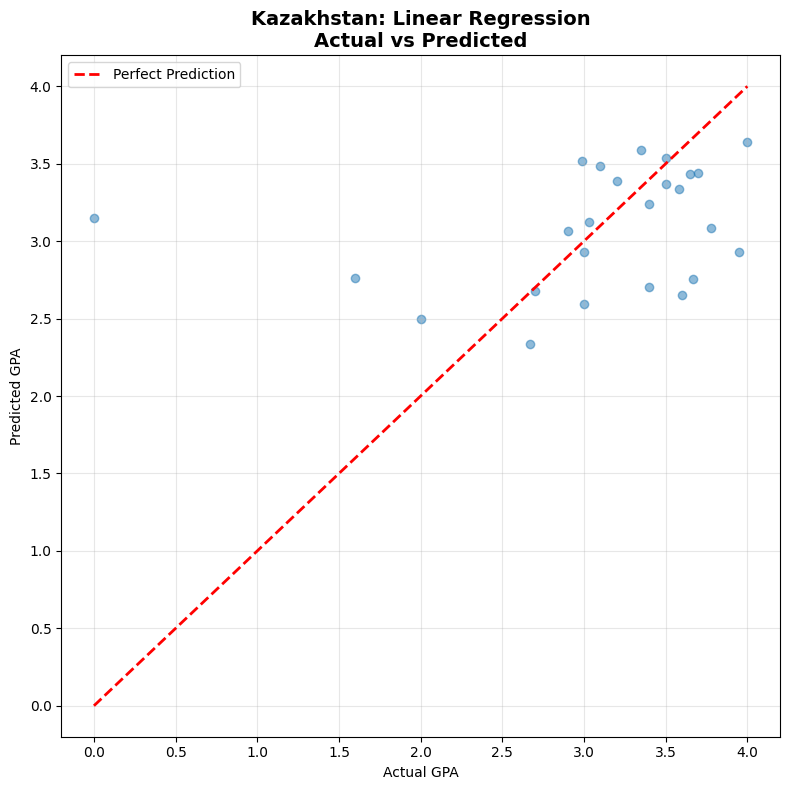

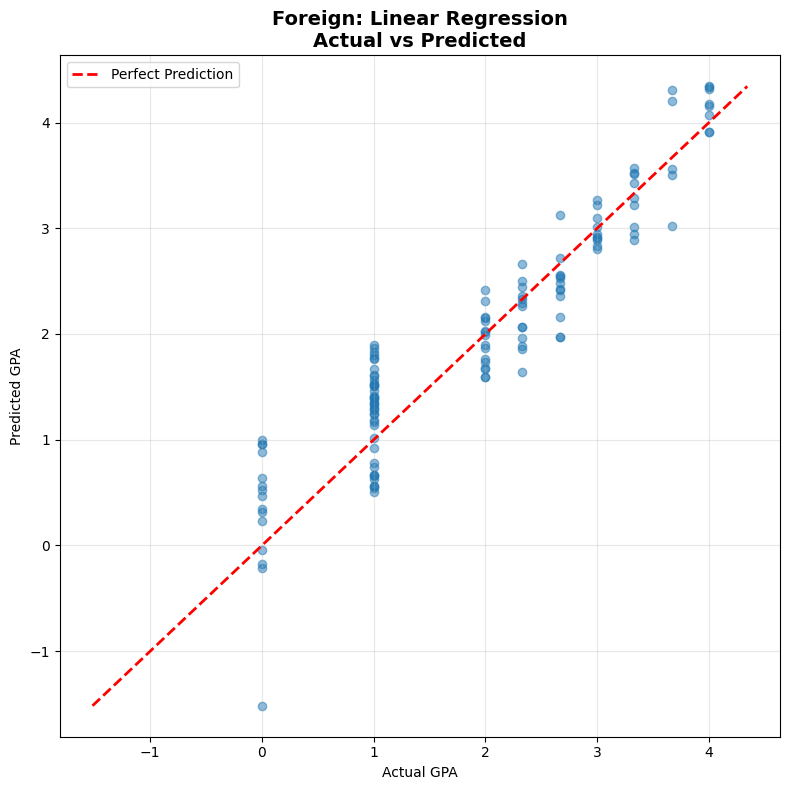

In [24]:
plot_actual_vs_predicted(kz_y_test, kz_lr_pred, "Linear Regression", "Kazakhstan")
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/kz_lr_actual_vs_predicted.png', 
            dpi=300, bbox_inches='tight')
plt.show()

plot_actual_vs_predicted(foreign_y_test, foreign_lr_pred, "Linear Regression", "Foreign")
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/foreign_lr_actual_vs_predicted.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# Residual Analysis

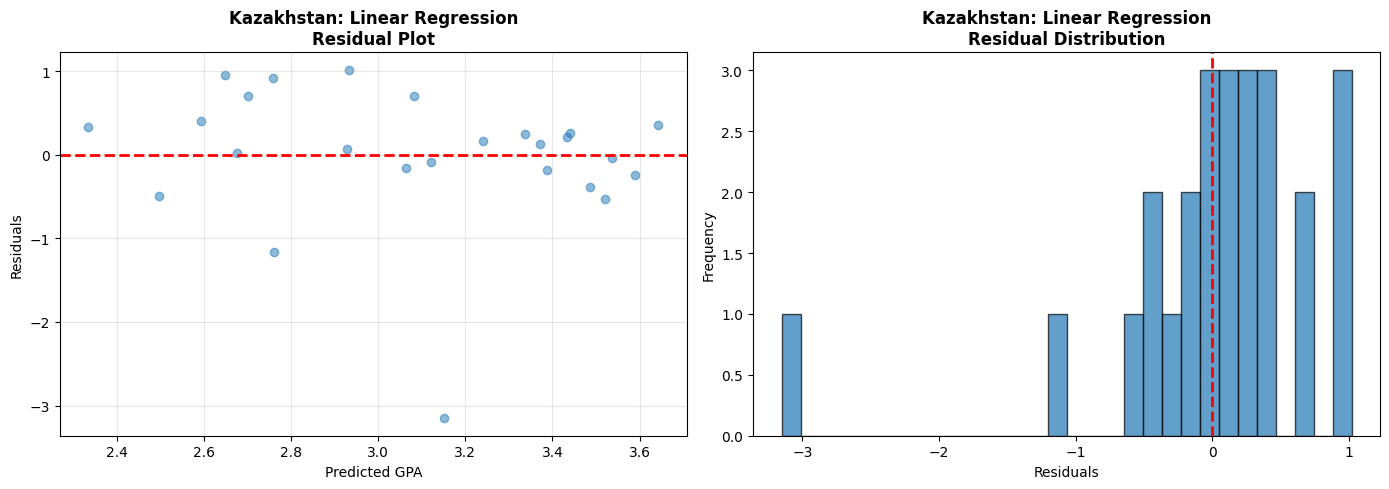

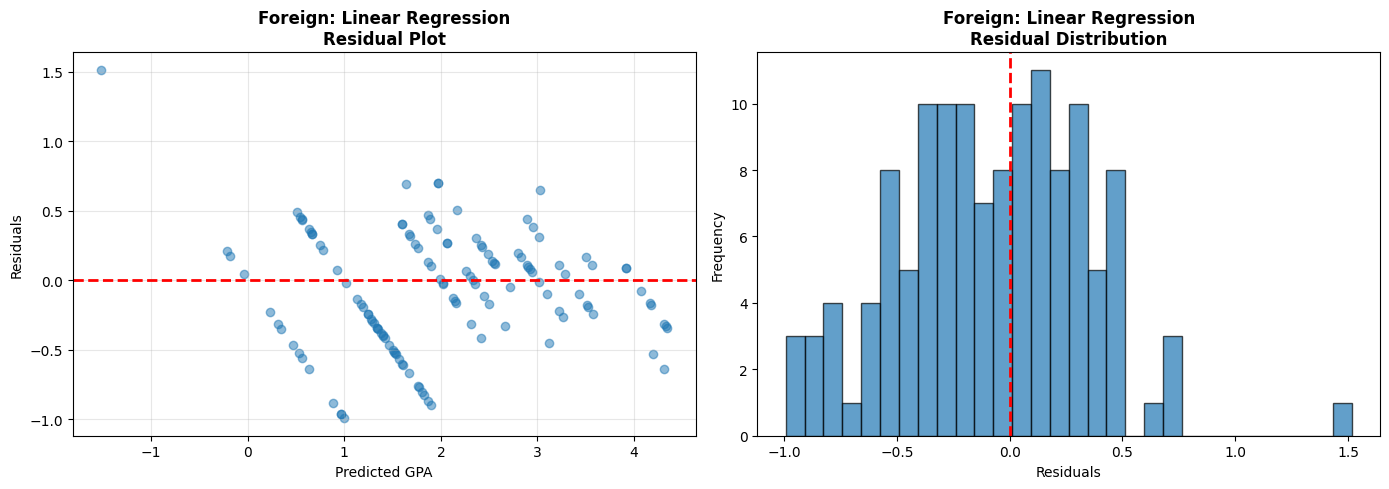

In [26]:
def plot_residuals(y_true, y_pred, model_name, dataset_name):
    """Plot residuals"""
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Residual plot
    axes[0].scatter(y_pred, residuals, alpha=0.5)
    axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[0].set_xlabel('Predicted GPA')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title(f'{dataset_name}: {model_name}\nResidual Plot', fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Histogram of residuals
    axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'{dataset_name}: {model_name}\nResidual Distribution', fontweight='bold')
    axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
    
    plt.tight_layout()
    return plt

# Kazakhstan
plot_residuals(kz_y_test, kz_lr_pred, "Linear Regression", "Kazakhstan")
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/kz_lr_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# Foreign
plot_residuals(foreign_y_test, foreign_lr_pred, "Linear Regression", "Foreign")
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/regression/foreign_lr_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# Save Results

In [27]:
all_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/regression/regression_models_comparison.csv', index=False)
print("Model comparison results saved!")

# Determine best models
kz_best = kz_results.loc[kz_results['Test_R2'].idxmax()]
foreign_best = foreign_results.loc[foreign_results['Test_R2'].idxmax()]

print(f"\nBest Model for Kazakhstan: {kz_best['Model']} (R² = {kz_best['Test_R2']:.4f})")
print(f"Best Model for Foreign: {foreign_best['Model']} (R² = {foreign_best['Test_R2']:.4f})")


Model comparison results saved!

Best Model for Kazakhstan: Elastic Net (R² = 0.1195)
Best Model for Foreign: Ridge Regression (R² = 0.8679)


In [28]:
best_models = pd.DataFrame([
    {'Dataset': 'Kazakhstan', 'Best_Model': kz_best['Model'], 
     'R2': kz_best['Test_R2'], 'RMSE': kz_best['Test_RMSE']},
    {'Dataset': 'Foreign', 'Best_Model': foreign_best['Model'], 
     'R2': foreign_best['Test_R2'], 'RMSE': foreign_best['Test_RMSE']}
])
best_models.to_csv('/Users/kassi/Data Mining/Final/Code/report/regression/best_regression_models.csv', index=False)